<a href="https://colab.research.google.com/github/IRazan/WORK_SHOP2/blob/master/Predicting_Student_Dropout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Predicting Student Dropout**
# <hr> 



>>
  <table>
        <thead>
            <th>
            Student’s Name
            </th>
            <th>
            Student’s ID
            </th>
        </thead>
        <tr>
            <td>
              Arwa Nasser Alqahtani  
            </td>
            <td>
              440018921  
            </td>
        </tr>
         <tr>
            <td>
              Razan Anwar Bajaaman  
            </td>
            <td>
                440022262
            </td>
        </tr>
         <tr>
            <td>
              Hajar Abdullaziz Aljassar  
            </td>
            <td>
               440020746             
            </td>
        </tr>
         <tr>
            <td>
              Reema Mohammed Aloqayli  
            </td>
            <td>
                440025060             
            </td>
        </tr>
                 <tr>
            <td>
              Reema Saeed Alqahtani  
            </td>
            <td>
                440018811
            </td>
        </tr>
    </table>

#Sourse code:


>*Import all require libraries*

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import f1_score
import numpy as np

>  *Read student dropout dataset*

In [ ]:
dataset = pd.read_csv("dataset.csv")
dataset

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,1,1,1,6,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,15,1,1,19,1,1,10,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,12,1,1,1,22,27,10,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9,1,1,1,22,27,8,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


> Use `info()` function to print full summary of the dataframe including list of all columns with their data types and the number of non-null values etc, as we see there are no null values.


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

> `.describe():` Display dataset's description: Count, max, min, mean, standard deviation ..etc.

In [ ]:
dataset.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,6.886980,1.727848,9.899186,0.890823,2.531420,1.254521,12.322107,16.455244,7.317812,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,5.298964,1.313793,4.331792,0.311897,3.963707,1.748447,9.026251,11.044800,3.997828,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,5.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,8.000000,1.000000,10.000000,1.000000,1.000000,1.000000,13.000000,14.000000,6.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,12.000000,2.000000,13.000000,1.000000,1.000000,1.000000,22.000000,27.000000,10.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,18.000000,9.000000,17.000000,1.000000,17.000000,21.000000,29.000000,34.000000,32.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [ ]:
# Check for any duplicates  
duplicates = dataset.duplicated().sum()
if duplicates == 0:
    print("No duplicated instances were found.")
else:
    print("A total of ", duplicates, " duplicates were found")

No duplicated instances were found.


In [ ]:
# Retrieve all unique target values
dataset['Target'].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

# Data Visualization

> by using `matplotlib.pyplot`
the `*.hist()*` provide histogram for each feature

In [ ]:
dataset['Target'].value_counts()

Graduate    2209
Dropout     1421
Enrolled     794
Name: Target, dtype: int64

<Axes: ylabel='Target'>

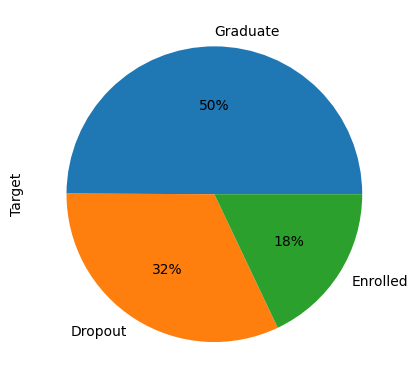

In [ ]:
# Plot distribution of student's academic state(Target)
dataset.Target.value_counts().plot.pie(
    y='Target',
    autopct='%1.0f%%'
)

our target


In [ ]:
# Change Target values to binary
# 1 --> Dropouts
# 0 --> Gradutes and enrolleds

dataset['Target'] = dataset['Target'].map({
    'Dropout':1,
    'Enrolled':0,
    'Graduate':0
})

<Axes: ylabel='Target'>

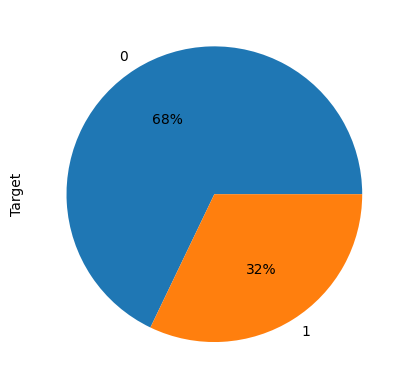

In [ ]:
# Plot distribution of student's academic state(Target) after changes values

dataset.Target.value_counts().plot.pie(
    y='Target',
    autopct='%1.0f%%'
)

> explination bussniss quition$$
****graph 




In [ ]:
# Display the correlation between independent variables and target
dataset.corr()['Target'].sort_values()

Curricular units 2nd sem (grade)                 -0.571792
Curricular units 2nd sem (approved)              -0.569500
Curricular units 1st sem (grade)                 -0.480669
Curricular units 1st sem (approved)              -0.479112
Tuition fees up to date                          -0.429149
Scholarship holder                               -0.245354
Curricular units 2nd sem (evaluations)           -0.154999
Curricular units 2nd sem (enrolled)              -0.141515
Curricular units 1st sem (enrolled)              -0.124635
Displaced                                        -0.107232
Curricular units 1st sem (evaluations)           -0.090125
Daytime/evening attendance                       -0.080499
Father's occupation                              -0.079753
Application order                                -0.070485
Mother's occupation                              -0.069102
GDP                                              -0.046319
Curricular units 2nd sem (credited)              -0.0330

<Axes: xlabel='Gender'>

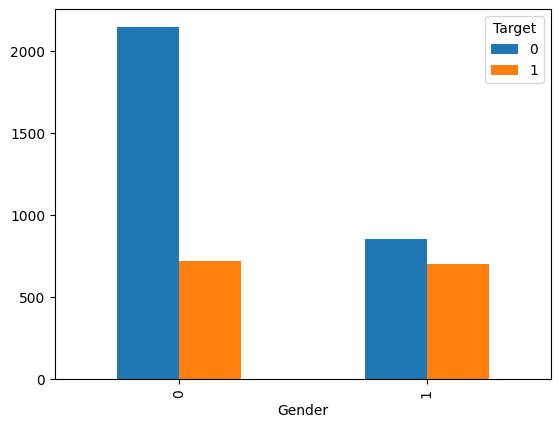

In [ ]:
# Plot gender and target relationship
CrosstabResult=pd.crosstab(index=dataset['Gender'],columns=dataset['Target'])
CrosstabResult.plot.bar()

<Figure size 900x400 with 0 Axes>

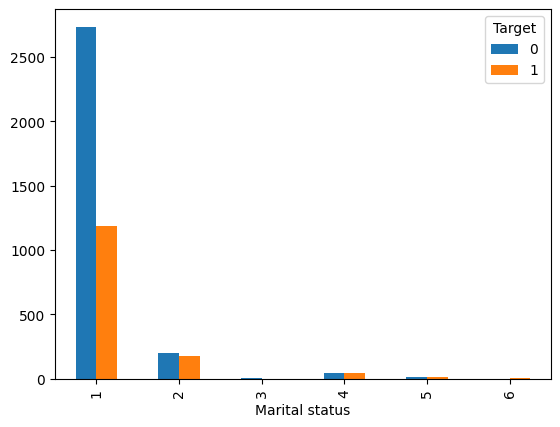

<Figure size 900x400 with 0 Axes>

In [ ]:
# Plot Marital status and target relationship
CrosstabResult=pd.crosstab(index=dataset['Marital status'],columns=dataset['Target'])
CrosstabResult.plot.bar()

plt.figure(figsize=(9,4))


<Axes: xlabel='Application mode'>

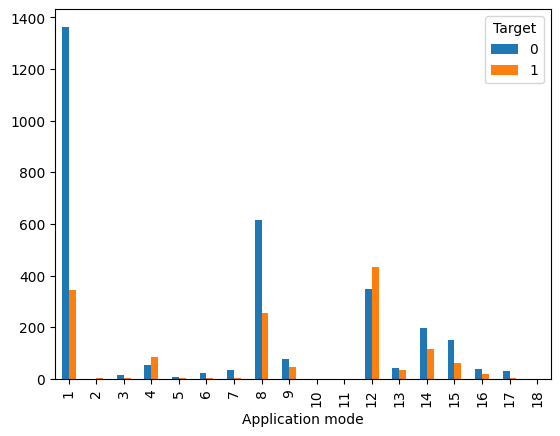

In [ ]:
# Plot Application mode and target relationship
CrosstabResult=pd.crosstab(index=dataset['Application mode'],columns=dataset['Target'])
CrosstabResult.plot.bar()

<Axes: xlabel='Application order'>

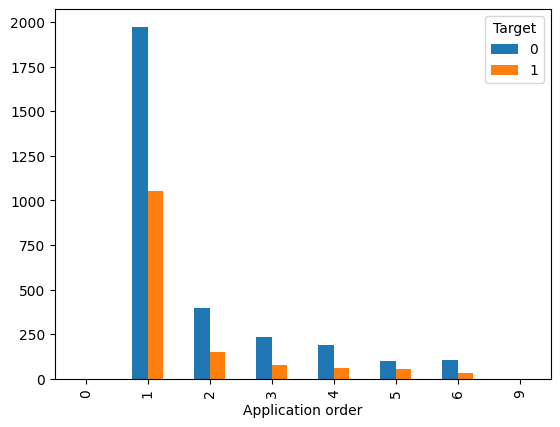

In [ ]:
# Plot Application order and target relationship
CrosstabResult=pd.crosstab(index=dataset['Application order'],columns=dataset['Target'])
CrosstabResult.plot.bar()

<Axes: xlabel='Course'>

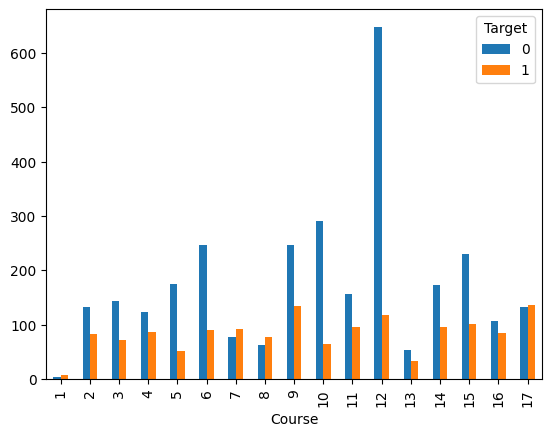

In [ ]:
# Plot Course and target relationship
CrosstabResult=pd.crosstab(index=dataset['Course'],columns=dataset['Target'])
CrosstabResult.plot.bar()

<Axes: xlabel='Daytime/evening attendance'>

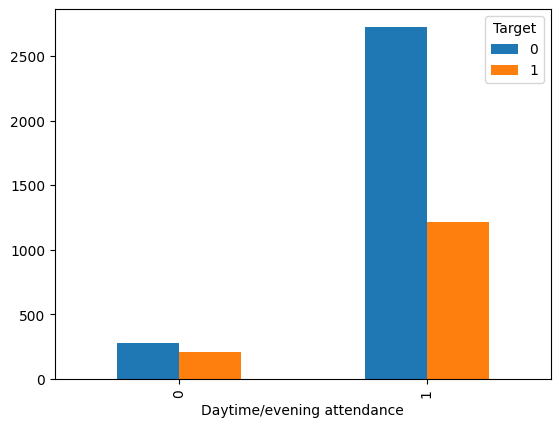

In [ ]:
# Plot Daytime/evening attendance and target relationship
CrosstabResult=pd.crosstab(index=dataset['Daytime/evening attendance'],columns=dataset['Target'])
CrosstabResult.plot.bar()

<Axes: xlabel='Debtor'>

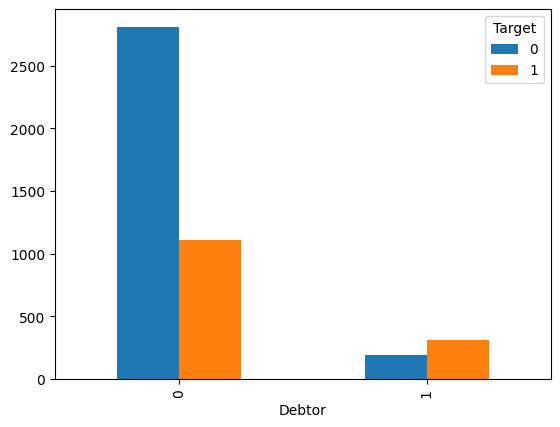

In [ ]:
# Plot Debtor and target relationship
CrosstabResult=pd.crosstab(index=dataset["Debtor"],columns=dataset['Target'])
CrosstabResult.plot.bar()

<Axes: xlabel='Tuition fees up to date'>

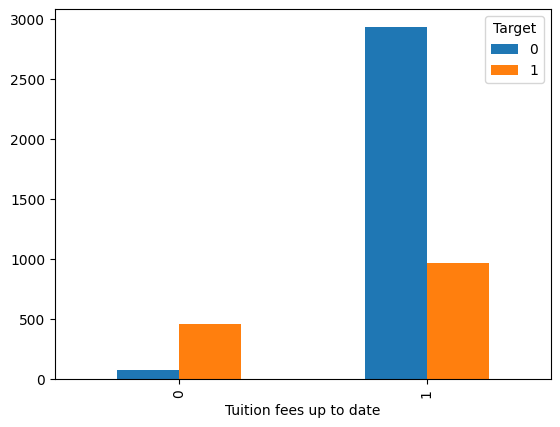

In [ ]:
# Plot Tuition fees up to date and target relationship
CrosstabResult=pd.crosstab(index=dataset["Tuition fees up to date"],columns=dataset['Target'])
CrosstabResult.plot.bar()

<Axes: xlabel='Scholarship holder'>

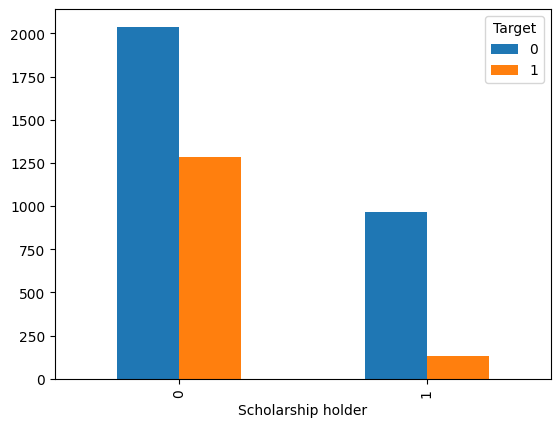

In [ ]:
# Plot Scholarship holder and target relationship
CrosstabResult=pd.crosstab(index=dataset["Scholarship holder"],columns=dataset['Target'])
CrosstabResult.plot.bar()

<Axes: xlabel='Displaced'>

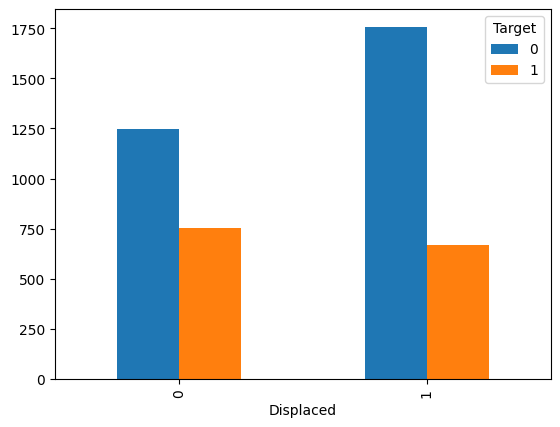

In [ ]:
CrosstabResult=pd.crosstab(index=dataset["Displaced"],columns=dataset['Target'])
CrosstabResult.plot.bar()

<Axes: xlabel='Age at enrollment'>

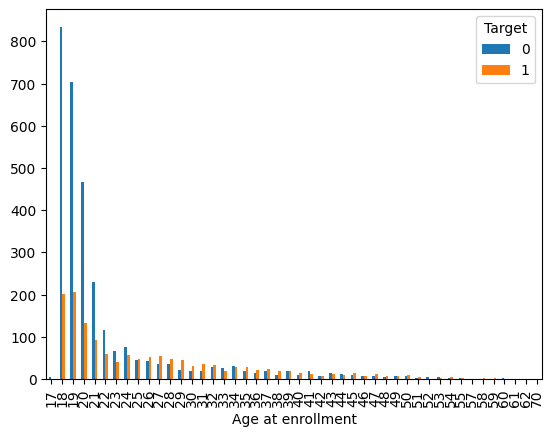

In [ ]:
# Plot Age at enrollment and target relationship
CrosstabResult=pd.crosstab(index=dataset["Age at enrollment"],columns=dataset['Target'])
CrosstabResult.plot.bar()

In [ ]:
from operator import index

pd.crosstab([dataset['Gender'],dataset['Age at enrollment']],dataset['Target'] )

Target                      0    1
Gender Age at enrollment          
0      17                   3    0
       18                 668  121
       19                 521  129
       20                 333   70
       21                 149   53
...                       ...  ...
1      58                   0    1
       59                   0    1
       60                   1    0
       61                   0    1
       70                   0    1

[88 rows x 2 columns]

<Axes: xlabel='Curricular units 1st sem (approved)'>

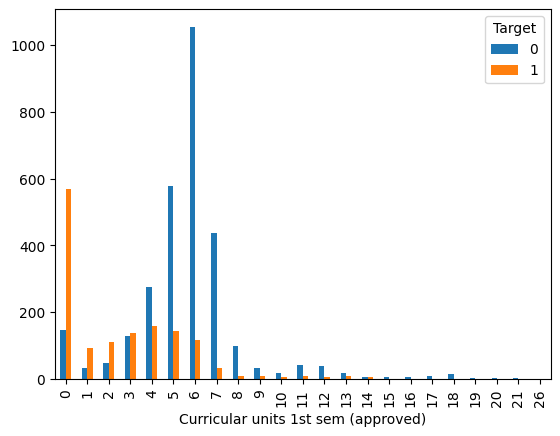

In [ ]:
# Plot Curricular units 1st sem (approved) and target relationship
CrosstabResult=pd.crosstab(index=dataset["Curricular units 1st sem (approved)"],columns=dataset['Target'])
CrosstabResult.plot.bar()

<Axes: xlabel='Curricular units 2nd sem (evaluations)'>

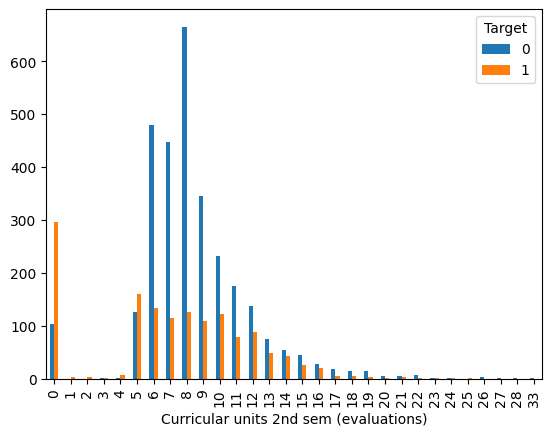

In [ ]:
# Plot Curricular units 2nd sem (evaluations) and target relationship
CrosstabResult=pd.crosstab(index=dataset["Curricular units 2nd sem (evaluations)"],columns=dataset['Target'])
CrosstabResult.plot.bar()

<Axes: xlabel='Curricular units 2nd sem (approved)'>

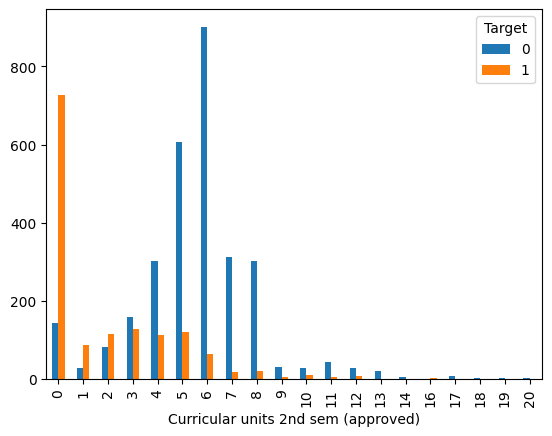

In [ ]:
# Plot Curricular units 2nd sem (approved) and target relationship
CrosstabResult=pd.crosstab(index=dataset["Curricular units 2nd sem (approved)"],columns=dataset['Target'])
CrosstabResult.plot.bar()

<Axes: ylabel='Gender'>

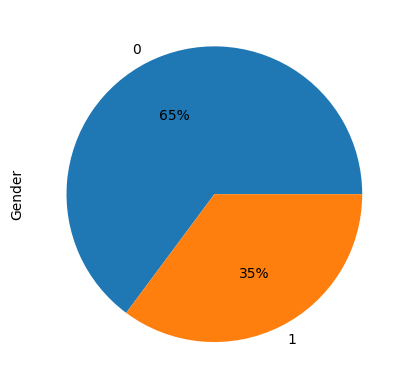

In [ ]:
# Plot distribution of student's genders
# 0 --> Female
# 1 --> Male
dataset.Gender.value_counts().plot.pie(
    y='Gender',
    autopct='%1.0f%%'
)


<Axes: ylabel='Debtor'>

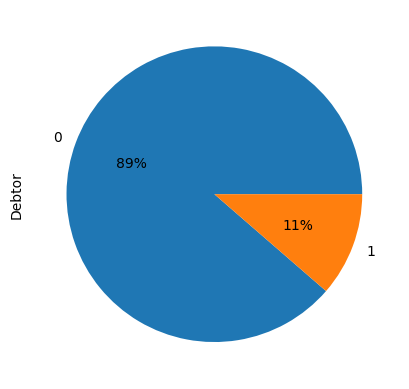

In [ ]:
# Plot distribution of debtors

dataset['Debtor'].value_counts().plot.pie(
    y='Debtor',
    autopct='%1.0f%%'
)

<Axes: ylabel='Scholarship holder'>

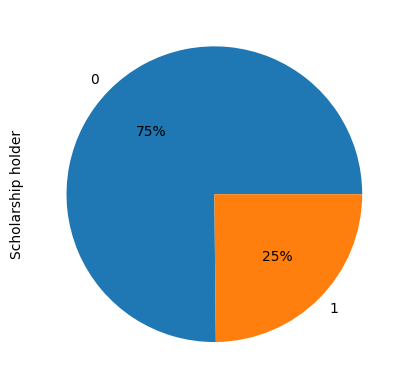

In [ ]:
# Plot distribution of student's Scholarship holder

dataset['Scholarship holder'].value_counts().plot.pie(
    y='Scholarship holder',
    autopct='%1.0f%%'
)

<Axes: xlabel='Age at enrollment'>

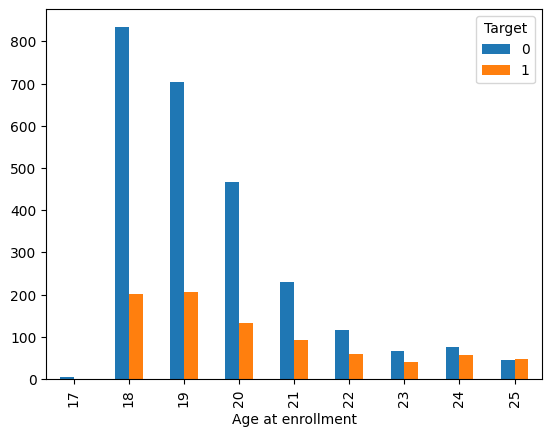

In [ ]:
# Plot distribution of student within age range between 17-25

population_1 = dataset.loc[(dataset['Age at enrollment'] <= 25)]
CrosstabResult=pd.crosstab(index=population_1["Age at enrollment"],columns=population_1['Target'])
CrosstabResult.plot.bar()

<Axes: xlabel='Age at enrollment'>

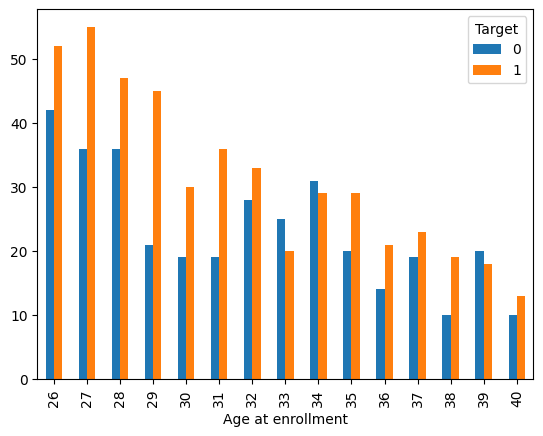

In [ ]:
# Plot distribution of student within age range between 26-40 

population_2 = dataset.loc[(dataset['Age at enrollment'] >25) & (dataset['Age at enrollment'] <= 40)]
CrosstabResult=pd.crosstab(index=population_2["Age at enrollment"],columns=population_2['Target'])
CrosstabResult.plot.bar()

<Axes: xlabel='Unemployment rate'>

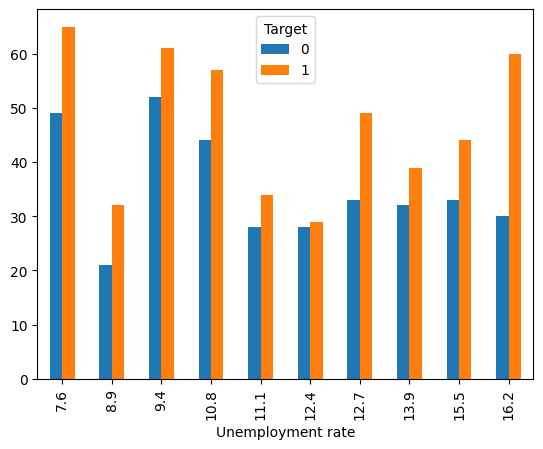

In [ ]:
# Plot distribution of student within age range between 26-40 and how the unemployment rate impacts their decision

population_3 = dataset.loc[(dataset['Age at enrollment'] >25) & (dataset['Age at enrollment'] <= 40)]
CrosstabResult=pd.crosstab(index=population_3["Unemployment rate"],columns=population_3['Target'])
CrosstabResult.plot.bar()

# Training and Testing data split

> Split the dataset into x and y variables.also, split attributes/variables to features and target variables

In [ ]:
X = dataset.drop(['Target'], axis = 1)
y = dataset['Target']

>  Split our dataset into 80% for training and 20% for testing

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

> Standardiztion

In [ ]:
scale = StandardScaler()
scaled_x_train = scale.fit_transform(X_train)
scaled_x_test = scale.fit_transform(X_test)
scaled_x_train

array([[-0.29725546,  0.96605096, -0.56054314, ...,  1.73625503,
        -0.67598062, -0.40939756],
       [-0.29725546,  1.53118198, -0.56054314, ...,  1.73625503,
        -0.67598062, -0.40939756],
       [ 1.37522002,  0.96605096, -0.56054314, ...,  1.47323145,
         1.13532153, -1.79047708],
       ...,
       [-0.29725546, -1.10609614,  0.9560946 , ...,  0.30841274,
        -0.53107645,  0.78255323],
       [-0.29725546, -1.10609614, -0.56054314, ...,  1.47323145,
         1.13532153, -1.79047708],
       [-0.29725546, -1.10609614, -0.56054314, ...,  0.42113714,
         1.7873903 , -0.75246827]])

# Training and evaluting model

> In this section , we choose # supervised learning that is appropriate for this problem and it is availble in `scikit-learn` and ..., we choose this model based on common reasoreces and reach paper

#KNN model

> Create a KNN model with k=3 and minkowski with a power of two

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3, metric = 'minkowski')
knn.fit(scaled_x_train, y_train)
y_pred = knn.predict(scaled_x_test)

>Reoprting our model preformance and classification accuracy


In [ ]:
print("KNN accuracy: ",accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))

KNN accuracy:  0.8124293785310734
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       601
           1       0.75      0.62      0.68       284

    accuracy                           0.81       885
   macro avg       0.79      0.76      0.77       885
weighted avg       0.81      0.81      0.81       885



> Confusion matrix

Confusion matrix
 [[544  57]
 [109 175]]


[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

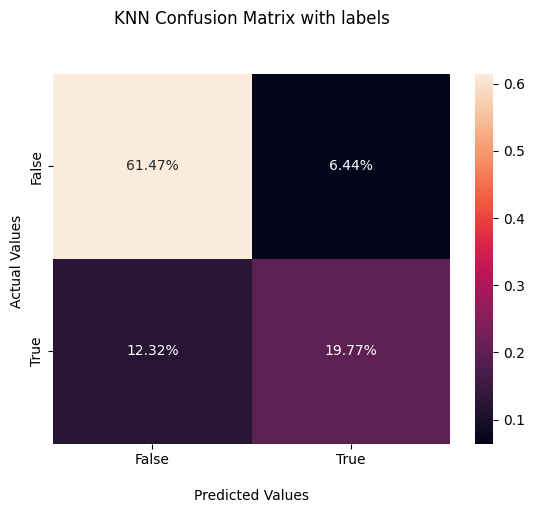

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n', cm)

n = sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%')

n.set_title('KNN Confusion Matrix with labels\n\n')
n.set_xlabel('\nPredicted Values')
n.set_ylabel('Actual Values ')

n.xaxis.set_ticklabels(['False','True'])
n.yaxis.set_ticklabels(['False','True'])

# Decision tree

In [ ]:
# Create a decision tree model/classifier <better results without standardiaztion>
dt = tree.DecisionTreeClassifier()
dt.fit(scaled_x_train, y_train)
y_pred3 = dt.predict(scaled_x_test)


>Reoprting our model preformance and classification accuracy


In [ ]:
print("Decision tree accuracy: ",accuracy_score(y_test,y_pred3))
print(classification_report(y_test, y_pred3))

Decision tree accuracy:  0.8101694915254237
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       601
           1       0.70      0.72      0.71       284

    accuracy                           0.81       885
   macro avg       0.78      0.79      0.78       885
weighted avg       0.81      0.81      0.81       885



> Confusion matrix

[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

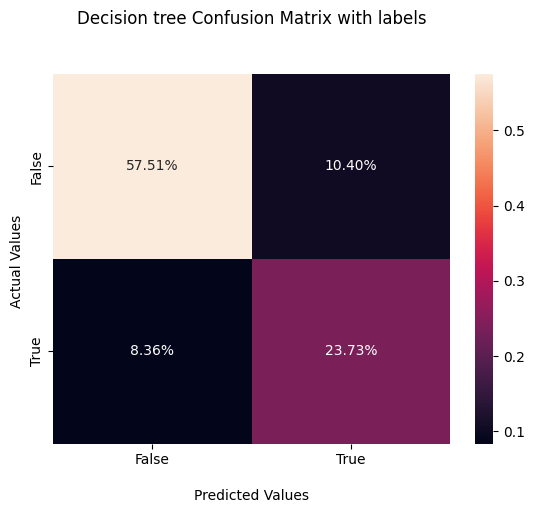

In [ ]:
cm = confusion_matrix(y_test, y_pred3)
# print('Confusion matrix\n', cm)

n = sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%')
n.set_title('Decision tree Confusion Matrix with labels\n\n');
n.set_xlabel('\nPredicted Values')
n.set_ylabel('Actual Values ');

n.xaxis.set_ticklabels(['False','True'])
n.yaxis.set_ticklabels(['False','True'])

#SVM

In [ ]:
from sklearn import svm
clf = svm.SVC()
clf.fit(scaled_x_train, y_train)
y_pred4 = clf.predict(scaled_x_test)

>Reoprting our model preformance and classification accuracy


In [ ]:
print("SVM accuarcy: ",accuracy_score(y_test,y_pred4))
print(classification_report(y_test, y_pred4))

SVM accuarcy:  0.8531073446327684
              precision    recall  f1-score   support

           0       0.85      0.95      0.90       601
           1       0.86      0.65      0.74       284

    accuracy                           0.85       885
   macro avg       0.85      0.80      0.82       885
weighted avg       0.85      0.85      0.85       885



> Confusion matrix

Confusion matrix
 [[570  31]
 [ 99 185]]


[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

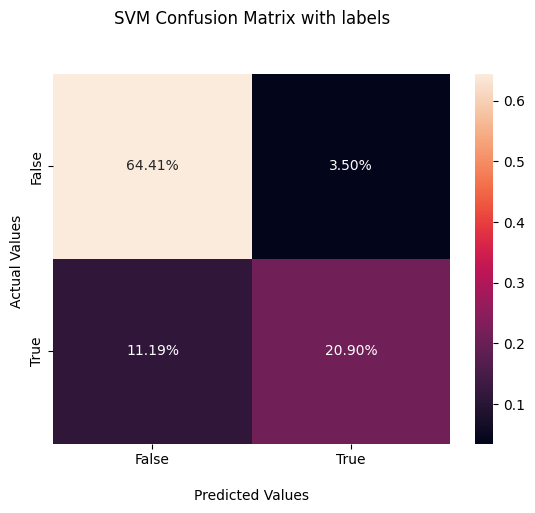

In [ ]:
cm = confusion_matrix(y_test, y_pred4)
print('Confusion matrix\n', cm)

n = sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%')
n.set_title('SVM Confusion Matrix with labels\n\n');
n.set_xlabel('\nPredicted Values')
n.set_ylabel('Actual Values ');

n.xaxis.set_ticklabels(['False','True'])
n.yaxis.set_ticklabels(['False','True'])

#Naive bayes

In [ ]:
GNB = GaussianNB()
GNB.fit(scaled_x_train, y_train)
y_pred6= GNB.predict(scaled_x_test)

>Reoprting our model preformance and classification accuracy


In [ ]:
print("Naive bayes accuarcy:",accuracy_score(y_test,y_pred6))
print(classification_report(y_test, y_pred6))

Naive bayes accuarcy: 0.8169491525423729
              precision    recall  f1-score   support

           0       0.86      0.87      0.87       601
           1       0.72      0.71      0.71       284

    accuracy                           0.82       885
   macro avg       0.79      0.79      0.79       885
weighted avg       0.82      0.82      0.82       885



> Confusion matrix

Confusion matrix
 [[521  80]
 [ 82 202]]


[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

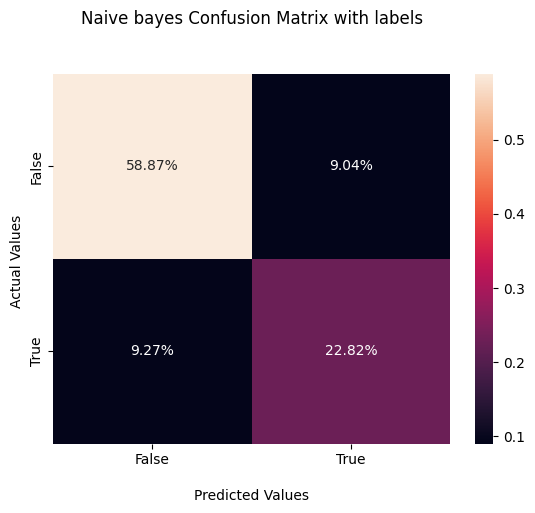

In [ ]:
cm = confusion_matrix(y_test, y_pred6)
print('Confusion matrix\n', cm)

n = sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%')
n.set_title('Naive bayes Confusion Matrix with labels\n\n');
n.set_xlabel('\nPredicted Values')
n.set_ylabel('Actual Values ');

n.xaxis.set_ticklabels(['False','True'])
n.yaxis.set_ticklabels(['False','True'])

# logistic regression model

> Hyper parameter tunning 

In [ ]:

import numpy as np

logModel = LogisticRegression()

param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(logModel, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)
best_clf = clf.fit(scaled_x_train,y_train)

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
2160 fits failed out of a total of 4800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: 

In [ ]:
best_clf.best_estimator_

LogisticRegression(C=1.623776739188721, penalty='l1', solver='liblinear')

In [ ]:
# Create a logistic regression model
lr = LogisticRegression(C=1.623776739188721, penalty='l1', solver='liblinear')
lr.fit(scaled_x_train, y_train)
y_pred2 = lr.predict(scaled_x_test)

>Reoprting our model preformance and classification accuracy


In [ ]:
# Reoprting our model preformance and classification accuracy <Slightly better results without standraiztion>
print("LogisticRegression accuracy",accuracy_score(y_test,y_pred2))
print(classification_report(y_test, y_pred2))

LogisticRegression accuracy 0.8689265536723164
              precision    recall  f1-score   support

           0       0.88      0.93      0.91       601
           1       0.84      0.74      0.78       284

    accuracy                           0.87       885
   macro avg       0.86      0.83      0.84       885
weighted avg       0.87      0.87      0.87       885



> Confusion matrix

Confusion matrix
 [[560  41]
 [ 75 209]]


[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

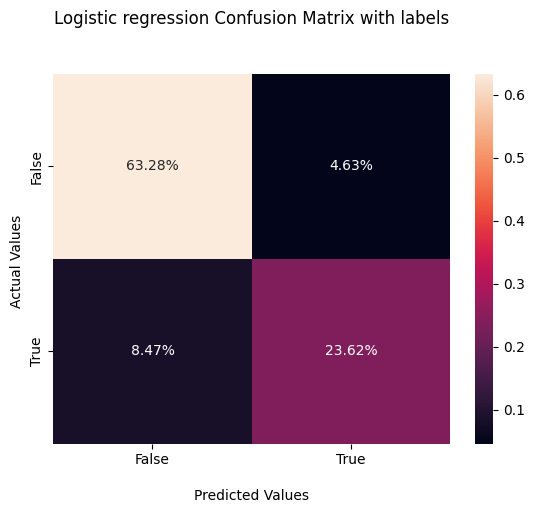

In [ ]:
cm = confusion_matrix(y_test, y_pred2)
print('Confusion matrix\n', cm)

n = sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%')
n.set_title('Logistic regression Confusion Matrix with labels\n\n');
n.set_xlabel('\nPredicted Values')
n.set_ylabel('Actual Values ');

n.xaxis.set_ticklabels(['False','True'])
n.yaxis.set_ticklabels(['False','True'])

##Conclusion


*   KNN accuracy :81.2% 

*   Decision tree accuracy : 80%
*   SVM accuracy : 85%

*   Naïve Bayes classifier accuracy :81.6%

*   Logistic regression accuracy : 86.9%









##Resourses:
1. https://stackoverflow.com/questions/66841470/how-to-count-different-values-and-plot-the-certain-column-from-a-pandas-datafram
2. https://github.com/JKabathova/Students-Dropout-Prediction/blob/main/2.DecisionTree(DT).ipynb
3.https://machinelearningmastery.com/get-your-hands-dirty-with-scikit-learn-now/
4.https://towardsdatascience.com/3-easy-ways-to-crosstab-in-pandas-4123383bfbf2
5. https://www.kaggle.com/code/funxexcel/p2-logistic-regression-hyperparameter-tuning
6.https://www.stackvidhya.com/plot-confusion-matrix-in-python-and-why/
